In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:

X = df[['enginesize','horsepower','citympg','highwaympg']]
Y = df['price']

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [6]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [8]:
Y_pred = model.predict(X_test_scaled)


In [9]:

print('Name:Varoodhini M')
print('Reg. No:212225220118')
print("MODEL COEFFICIENTS:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:>12}:{coef:>10}")
print(f"{'Intercept':>12}:{model.intercept_:>10}")

Name:Varoodhini M
Reg. No:212225220118
MODEL COEFFICIENTS:
  enginesize:4523.404901011966
  horsepower:1694.2232554525806
     citympg:-392.5731841571549
  highwaympg:-816.3577991826088
   Intercept:13223.414634146342


In [10]:

print("\nMODEL PERFORMANCE:")
print(f"{'MSE':>12}:{mean_squared_error(Y_test,Y_pred):>10.2f}")
print(f"{'RMSE':>12}:{np.sqrt(mean_squared_error(Y_test,Y_pred)):>10.2f}")
print(f"{'R-squared':>12}: {r2_score(Y_test,Y_pred):>10.2f}")


MODEL PERFORMANCE:
         MSE:16471505.90
        RMSE:   4058.51
   R-squared:       0.79


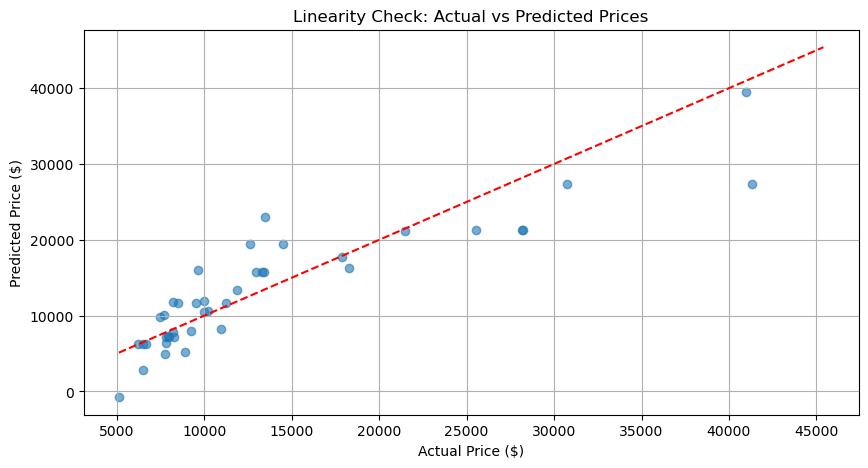

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred, alpha=0.6)
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()


In [13]:
residuals =Y_test-Y_pred
dw_test=sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}",
     "\n(Values close to 2 indicate no autocorrelation)")


Durbin-Watson Statistic: 2.28 
(Values close to 2 indicate no autocorrelation)


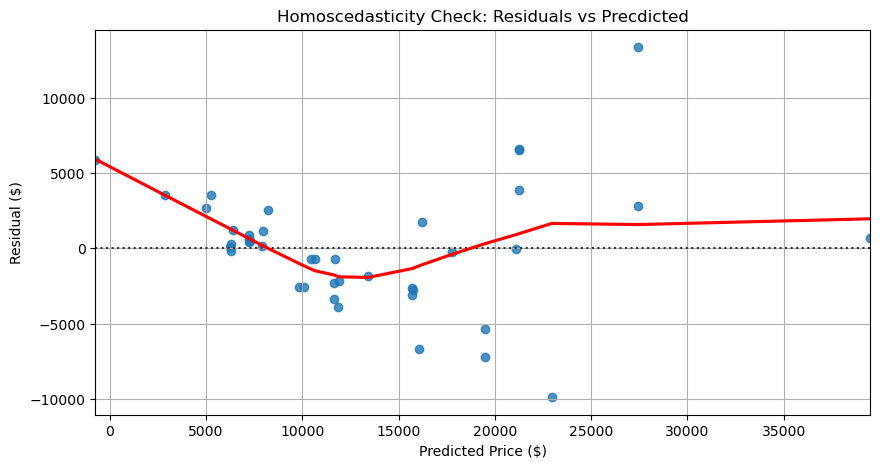

In [22]:
plt.figure(figsize=(10,5))
sns.residplot(x=Y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.title("Homoscedasticity Check: Residuals vs Precdicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residual ($)")
plt.grid(True)
plt.show()

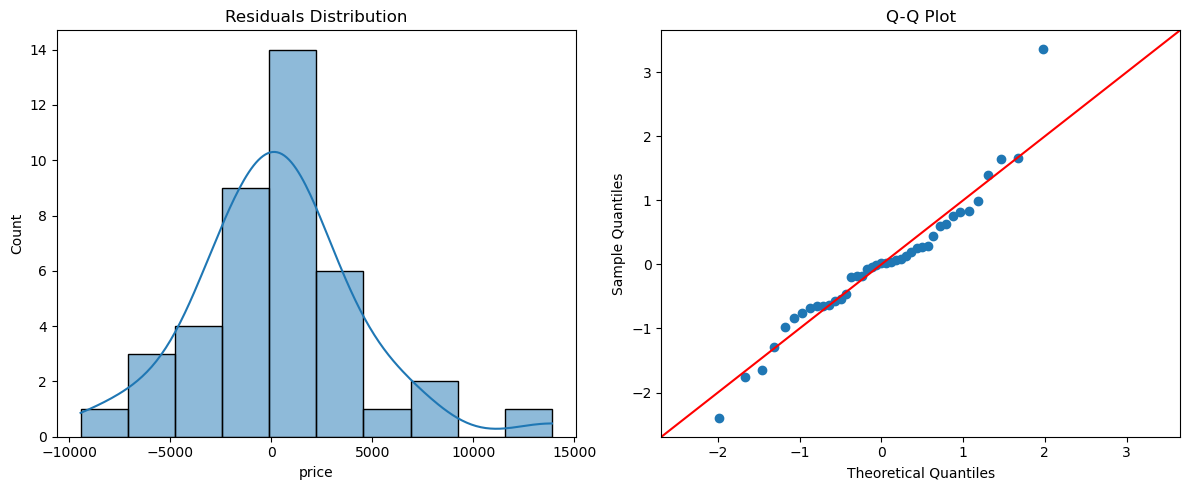

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals,kde=True,ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals,line='45',fit=True,ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()